<a href="https://colab.research.google.com/github/greesta/bikedataset/blob/main/Personalized_Learning_Platform_Fix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import all modules

In [ ]:
# import necessary libraries for data manipulation, visualization, and machine learning
import pandas as pd  # for data manipulation
import numpy as np  # for numerical operations
import matplotlib.pyplot as plt  # for plotting graphs
import seaborn as sns  # for advanced data visualization
from babel.numbers import format_currency  # for formatting currency values
from IPython.display import display  # for displaying outputs in Jupyter notebooks
sns.set(style='dark')  # set the Seaborn style for plotting
from collections import Counter  # for counting occurrences in lists
from sklearn.model_selection import train_test_split  # for splitting data into training and testing sets
from sklearn.feature_extraction.text import TfidfVectorizer  # for converting text data into numerical form
from sklearn.preprocessing import LabelEncoder  # for encoding labels into integers
from tensorflow import keras  # for working with TensorFlow/Keras models
from tensorflow.keras import layers  # for defining layers in Keras models
from tensorflow.keras.models import Sequential  # for creating Sequential models in Keras

## Data collection

In [ ]:
# load the Coursera dataset from the provided URL (github) into the coursera_df DataFrame
url = "https://raw.githubusercontent.com/ndy-nin/KreasiMLdata/refs/heads/main/data/Coursera.csv"
coursera_df = pd.read_csv(url)
coursera_df

,partner,course,skills,rating,reviewcount,level,certificatetype,duration,crediteligibility
0,Google,Google Cybersecurity,"{"" Network Security"","" Python Programming"","" L...",4.8,16.4k,Beginner,Professional Certificate,3 - 6 Months,False
1,Google,Google Data Analytics,"{"" Data Analysis"","" R Programming"","" SQL"","" Bu...",4.8,133.4k,Beginner,Professional Certificate,3 - 6 Months,True
2,Google,Google Project Management:,"{"" Project Management"","" Strategy and Operatio...",4.8,97.3k,Beginner,Professional Certificate,3 - 6 Months,True
3,Google,Google Digital Marketing & E-commerce,"{"" Digital Marketing"","" Marketing"","" Marketing...",4.8,21.4k,Beginner,Professional Certificate,3 - 6 Months,False
4,Google,Google IT Support,"{"" Computer Networking"","" Network Architecture...",4.8,181.4k,Beginner,Professional Certificate,3 - 6 Months,True
...,...,...,...,...,...,...,...,...,...
1134,IIT Guwahati,Post Graduate Certificate in Cloud Computing A...,NaN,NaN,NaN,NaN,University Certificate,6 - 12 Months,False
1135,IE Business School,Business Essentials University Certificate,"{"" Strategy and Operations"","" Leadership and M...",NaN,NaN,NaN,University Certificate,6 - 12 Months,False
1136,IIT Roorkee,Post Graduate Certificate in Strategic Supply ...,"{"" Machine Learning"","" Python Programming"","" R...",NaN,NaN,NaN,University Certificate,6 - 12 Months,False
1137,IIT Bombay,Power Electronics and Motors for Electric Vehi...,NaN,NaN,NaN,NaN,University Certificate,6 - 12 Months,False


## Exploratory Data Analysis (EDA)

In [ ]:
# get a summary of the DataFrame, including the number of non-null values and data types for each column
coursera_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1139 entries, 0 to 1138
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   partner            1139 non-null   object 
 1   course             1139 non-null   object 
 2   skills             1088 non-null   object 
 3   rating             993 non-null    float64
 4   reviewcount        993 non-null    object 
 5   level              1004 non-null   object 
 6   certificatetype    1116 non-null   object 
 7   duration           1116 non-null   object 
 8   crediteligibility  1139 non-null   bool   
dtypes: bool(1), float64(1), object(7)
memory usage: 72.4+ KB


In [ ]:
# count the number of missing (NaN) values in each column of the coursera_df DataFrame
coursera_df.isna().sum()

,0
partner,0
course,0
skills,51
rating,146
reviewcount,146
level,135
certificatetype,23
duration,23
crediteligibility,0


## Data Preparation

In [ ]:
# count the number of duplicate rows in the coursera_df DataFrame after removing duplicates
coursera_df.duplicated().sum()

10

In [ ]:
# remove rows with NaN values from the coursera_df DataFrame, modifying the DataFrame in place
coursera_df.dropna(inplace=True)

In [ ]:
# remove duplicate rows from the coursera_df DataFrame
coursera_df = coursera_df.drop_duplicates()

In [ ]:
# count the number of duplicate rows in the coursera_df DataFrame
coursera_df.duplicated().sum()

0

In [ ]:
# fill NaN values in the coursera_df DataFrame with 0, modifying the DataFrame in place
coursera_df.fillna(0, inplace=True)

In [ ]:
# get the summary statistics of the numeric columns in the coursera_df DataFrame
coursera_df.describe()

,rating
count,993.000000
mean,4.677241
std,0.190091
min,2.800000
25%,4.600000
50%,4.700000
75%,4.800000
max,5.000000


In [ ]:
# get the number of unique values for each column in the coursera_df DataFrame
coursera_df.nunique()

,0
partner,158
course,986
skills,917
rating,16
reviewcount,520
level,4
certificatetype,4
duration,4
crediteligibility,2


### Level Selection and Preparation for Modelling

In [ ]:
# get unique levels from the 'level' column
unique_levels = coursera_df['level'].unique()
print("Existing levels:", unique_levels)

# count the occurrences of each level in the 'level' column
level_counts = coursera_df['level'].value_counts()
print("Number of each level:\n", level_counts)

# get unique levels excluding NaN values
unique_levels_nonan = coursera_df['level'].dropna().unique()
print("Existing level (without NaN):", unique_levels_nonan)

Existing levels: ['Beginner ' 'Intermediate ' 'Advanced ' 'Mixed ']
Number of each level:
 level
Beginner         672
Intermediate     198
Mixed             88
Advanced          35
Name: count, dtype: int64
Existing level (without NaN): ['Beginner ' 'Intermediate ' 'Advanced ' 'Mixed ']


In [ ]:
# display the information about the coursera_df DataFrame, including the number of entries, columns, and data types
coursera_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 993 entries, 0 to 1022
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   partner            993 non-null    object 
 1   course             993 non-null    object 
 2   skills             993 non-null    object 
 3   rating             993 non-null    float64
 4   reviewcount        993 non-null    object 
 5   level              993 non-null    object 
 6   certificatetype    993 non-null    object 
 7   duration           993 non-null    object 
 8   crediteligibility  993 non-null    bool   
dtypes: bool(1), float64(1), object(7)
memory usage: 70.8+ KB


In [ ]:
# get unique levels from the 'level' column
unique_levels = coursera_df['level'].unique()

# loop through each level to print courses associated with it
for level in unique_levels:
    # filter courses for the current level
    level_courses = coursera_df[coursera_df['level'] == level]['course']

    # print the courses for the current level
    print(f"\nCourses in level '{level}':")
    for course in level_courses:
        print(course)


Courses in level 'Beginner ':
Google Cybersecurity
Google Data Analytics
Google Project Management:
Google Digital Marketing & E-commerce
Google IT Support
IBM Data Science
Google UX Design
IBM Data Analyst
Machine Learning
Introduction to Data Science
Generative AI for Everyone
IBM DevOps and Software Engineering
IBM Full Stack Software Developer
Key Technologies for Business
Data Science Fundamentals with Python and SQL
IBM & Darden Digital Strategy
IBM Data Engineering
IBM Data Analytics with Excel and R
Data Analysis and Visualization Foundations
IBM AI Foundations for Business
Data Engineering Foundations
IBM Back-End Development
Applied Data Science
IBM Applied AI
Excel Skills for Business
Applied Software Engineering Fundamentals
DevOps, Cloud, and Agile Foundations
Meta Front-End Developer
Cloud Application Development Foundations
Foundations of Project Management
Foundations of Cybersecurity
IBM IT Support
Foundations: Data, Data, Everywhere
IBM IT Project Manager
Google IT A

In [ ]:
# fill NaN values in the 'level' column with 'Unknown' and convert to string type
coursera_df['level'] = coursera_df['level'].fillna('Unknown').astype(str)

### Skill Selection and Preparation for Modeling

In [ ]:
# clean the 'skills' column by converting to lowercase and filling NaN values with empty string
coursera_df['skills_cleaned'] = coursera_df['skills'].str.lower().fillna('')

In [ ]:
from collections import Counter  # import Counter from collections module

# combine all skills into a single string and split by commas
all_skills = coursera_df['skills'].dropna().str.cat(sep=',').split(',')

# clean up skills by stripping extra spaces and converting to lowercase
all_skills = [skill.strip().lower() for skill in all_skills]

# count the occurrences of each skill
skill_counts = Counter(all_skills)

# get the 10 most common skills
most_common_skills = skill_counts.most_common(10)

# print the most frequent skills with their counts
print("The most frequent keywords appear in the column 'skills':")
for skill, count in most_common_skills:
    print(f"{skill}: {count} times")

The most frequent keywords appear in the column 'skills':
" leadership and management": 215 times
" data analysis": 193 times
" strategy": 157 times
" strategy and operations": 150 times
" critical thinking": 149 times
" problem solving": 145 times
" communication": 137 times
" computer programming": 135 times
" business analysis": 111 times
" decision making": 108 times


In [ ]:
# define a function to get courses based on level and skill
def get_courses_by_level_and_skill(level, skill):
    # filter courses by matching level and skill
    matching_courses = coursera_df[(coursera_df['level'] == level) &
                                   (coursera_df['skills_cleaned'].apply(lambda x: skill.lower() in x))]
    return matching_courses[['course', 'skills']]

# get unique levels from the DataFrame
unique_levels = coursera_df['level'].unique()

# define a list of skills to search for
skills_to_search = [
    "leadership and management", "data analysis", "strategy",
    "strategy and operations", "critical thinking", "problem solving",
    "communication", "computer programming", "business analysis", "decision making"
]

# loop through each level to get the relevant courses for each skill
for level in unique_levels:
    print(f"\nCourses for level '{level.strip()}':")
    for skill in skills_to_search:
        # get courses for the current skill and level
        courses_for_skill = get_courses_by_level_and_skill(level, skill)
        # if courses are found, print them
        if not courses_for_skill.empty:
            print(f"\nSkill '{skill}' courses:")
            for course in courses_for_skill['course']:
                print(f"- {course}")


Courses for level 'Beginner':

Skill 'leadership and management' courses:
- Google Cybersecurity
- Google Data Analytics
- Google Project Management:
- Google IT Support
- IBM DevOps and Software Engineering
- IBM Full Stack Software Developer
- IBM & Darden Digital Strategy
- IBM Data Engineering
- IBM AI Foundations for Business
- Data Engineering Foundations
- IBM Back-End Development
- Excel Skills for Business
- Applied Software Engineering Fundamentals
- DevOps, Cloud, and Agile Foundations
- Foundations of Project Management
- Foundations of Cybersecurity
- IBM IT Support
- IBM IT Project Manager
- Google IT Automation with Python
- IBM Data Warehouse Engineer
- IBM Cybersecurity Analyst
- IBM Front-End Developer
- Business Foundations
- BI Foundations with SQL, ETL and Data Warehousing
- IBM IT Scrum Master
- IBM Project Manager
- IT Fundamentals for Cybersecurity
- Project Execution: Running the Project
- Meta Social Media Marketing
- AI in Healthcare
- Play It Safe: Manage S

In [ ]:
# display information about the DataFrame
coursera_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 993 entries, 0 to 1022
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   partner            993 non-null    object 
 1   course             993 non-null    object 
 2   skills             993 non-null    object 
 3   rating             993 non-null    float64
 4   reviewcount        993 non-null    object 
 5   level              993 non-null    object 
 6   certificatetype    993 non-null    object 
 7   duration           993 non-null    object 
 8   crediteligibility  993 non-null    bool   
 9   skills_cleaned     993 non-null    object 
dtypes: bool(1), float64(1), object(8)
memory usage: 78.5+ KB


## Modeling

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4878 - loss: 1.2546 - val_accuracy: 0.6985 - val_loss: 0.9235
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6676 - loss: 0.8918 - val_accuracy: 0.6985 - val_loss: 0.8297
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6831 - loss: 0.8029 - val_accuracy: 0.7337 - val_loss: 0.7546
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7218 - loss: 0.6857 - val_accuracy: 0.7487 - val_loss: 0.6749
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7597 - loss: 0.6060 - val_accuracy: 0.7688 - val_loss: 0.5843
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8471 - loss: 0.4346 - val_accuracy: 0.8090 - val_loss: 0.4896
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8551 - loss: 0.3771 - val_accuracy: 0.8141 - val_loss: 0.4208
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9156 - loss: 0.2635 - val_accuracy: 0.8693 - val_loss

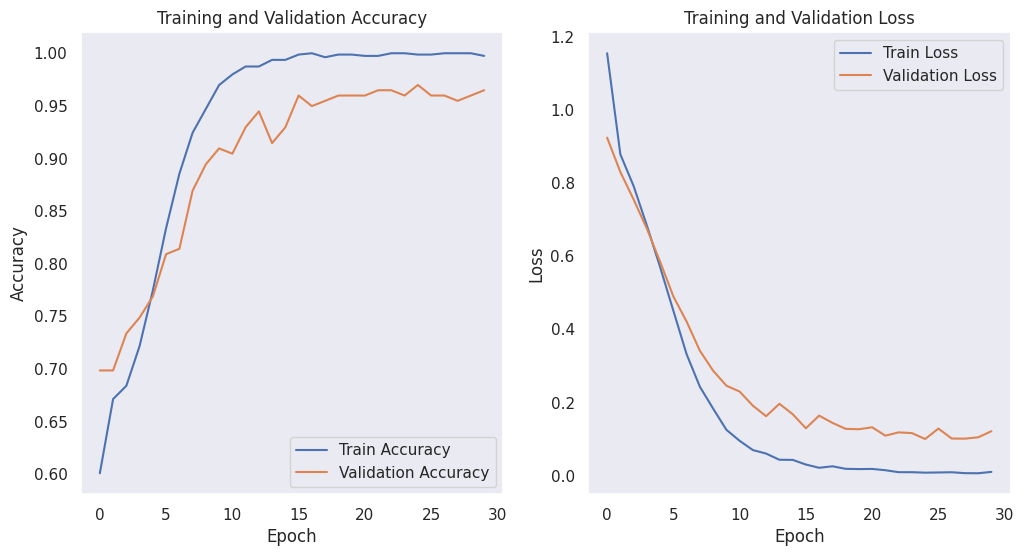

In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential, layers, optimizers
import matplotlib.pyplot as plt

# fill missing values in coursera_df
coursera_df['course'] = coursera_df['course'].fillna('Unknown Course')
coursera_df['level'] = coursera_df['level'].fillna('Unknown')

# combine level and skills into a single feature column
coursera_df['combined_features'] = coursera_df['level'] + " " + coursera_df['skills'].fillna('')

# define a list of top skills
top_skills = [
    "leadership and management", "data analysis", "strategy",
    "strategy and operations", "critical thinking", "problem solving",
    "communication", "computer programming", "business analysis", "decision making"
]

# create new columns indicating whether each skill is present in the 'skills' column
for skill in top_skills:
    coursera_df[f'contains_{skill}'] = coursera_df['skills'].apply(lambda x: 1 if skill in str(x).lower() else 0)

# vectorize the combined features using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(coursera_df['combined_features']).toarray()

# add the skill presence columns to the features
X = np.hstack([X, coursera_df[[f'contains_{skill}' for skill in top_skills]].values])

# encode the target variable 'level'
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(coursera_df['level'])

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# define the neural network model
model = Sequential([
    layers.Dense(128, activation='relu', input_dim=X_train.shape[1]),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(len(np.unique(y)), activation='softmax')
])

# compile the model
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# train the model
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

# print training and validation accuracy
print("Training Accuracy:", history.history['accuracy'][-1])
print("Validation Accuracy:", history.history['val_accuracy'][-1])

# plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


## Deployment

In [ ]:
# Function to calculate total score based on user-provided skills and scores
def calculate_score(user_skills_with_scores):
    total_score = 0
    for skill, score in user_skills_with_scores.items():
        if skill.lower() in top_skills:
            total_score += score
    return total_score

def classify_level(score):
    if score == 0:
        return "Beginner"
    elif 1 <= score <= 3:
        return "Intermediate"
    elif 4 <= score <= 6:
        return "Mixed"
    else:
        return "Advanced"

# Function to get user input for skills and scores
def get_user_input():
    print("Enter the skills you have from the following list:")
    print(", ".join(top_skills))

    user_skills_with_scores = {}

    while True:
        skill = input("Enter one skill you have (or press Enter to finish): ")

        if not skill:
            break

        if skill.lower() in [s.lower() for s in top_skills]:
            while True:
                try:
                    score = int(input(f"Enter the score for the skill '{skill}': "))
                    if score < 0:
                        print("Score must be a positive number.")
                    else:
                        user_skills_with_scores[skill] = score
                        break
                except ValueError:
                    print("Invalid input. Please enter a number for the score.")
            break
        else:
            print(f"The skill '{skill}' is not in the top_skills list.")

    return user_skills_with_scores

# Function to calculate user level based on their skills and scores
def get_user_level(user_skills_with_scores):
    score = calculate_score(user_skills_with_scores) # Calculate total score
    level = classify_level(score) # Determine level from score
    return level, score

# Function to recommend courses based on user's level and skills
def recommend_courses(user_level, user_skills):

    # Combine user level and skills into a single string for vectorization
    combined_input = user_level + " " + user_skills

    # Transform combined input into a vector
    user_vector = vectorizer.transform([combined_input]).toarray()

    # Add additional skill-based features
    skill_features = np.array([[1 if skill in user_skills.lower() else 0 for skill in top_skills]])
    user_vector = np.hstack([user_vector, skill_features])  # Combine features into final vector

    # Predict user's target level using the model
    predicted_level = model.predict(user_vector)
    predicted_level_index = np.argmax(predicted_level)  # Get index of the highest prediction
    predicted_level_name = label_encoder.inverse_transform([predicted_level_index])[0]  # Decode to level name

    # Filter and return courses matching predicted level and user skills
    recommended_courses = coursera_df[
        (coursera_df['level'] == predicted_level_name) &
        (coursera_df['skills'].str.contains(user_skills, case=False, na=False))
    ]['course']

    return recommended_courses.tolist()

# Collect user input
user_skills_with_scores = get_user_input()
user_level, score = get_user_level(user_skills_with_scores)
user_skills = ", ".join(user_skills_with_scores.keys())

# Recommend courses
recommended_courses = recommend_courses(user_level, user_skills)

# Display results
print(f"Your total score: {score}")
print(f"Your level based on the provided skills: {user_level}")
print(f"Recommended courses for level '{user_level}' and skill '{user_skills}':")
print(recommended_courses)

Enter the skills you have from the following list:
leadership and management, data analysis, strategy, strategy and operations, critical thinking, problem solving, communication, computer programming, business analysis, decision making
Enter one skill you have (or press Enter to finish): strategy
Enter the score for the skill 'strategy': 90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Your total score: 90
Your level based on the provided skills: Advanced
Recommended courses for level 'Advanced' and skill 'strategy':
['Self-Driving Cars', 'Advanced Valuation and Strategy - M&A, Private Equity, and Venture Capital']


## Convert the model to TensorFlow.js

In [ ]:
pip install tensorflowjs

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [ ]:
X_train.shape

(794, 400)

In [ ]:
num_classes = len(np.unique(y_train))
print(num_classes)

4


In [ ]:
# print the summary of the model architecture to view the layers and parameters
print(model)

<Sequential name=sequential, built=True>


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define input_shape and num_classes
input_shape = 400  # 400 features (columns)
num_classes = 4   # 4 classes (binary classification)

# Build the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(input_shape,)),  # input_shape=(10,)
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')  # output for 2 classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
!tensorflowjs_converter --input_format=keras model.keras tfjs_model  # convert Keras model to TensorFlow.js format

2024-12-05 14:35:33.701709: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733409334.188260    9649 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733409334.308578    9649 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
Traceback (most recent call last):
  File "/usr/local/bin/tensorflowjs_converter", line 8, in <module>
    sys.exit(pip_main())
  File "/usr/local/lib/python3.10/dist-packages/tensorflowjs/converters/converter.py", line 959, in pip_main
    main([' '.join(sys.argv[1:])])
  File "/usr/local/lib/python3.10/dist-package

In [ ]:
# save the trained model in the Keras native format (.keras)
model.save('model.keras')

In [ ]:
# list all files and directories in the current working directory
import os
print(os.listdir('.'))

['.config', 'model.keras', 'sample_data']


In [ ]:
from google.colab import files
files.download('model.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!ls -l tfjs_model.zip

ls: cannot access 'tfjs_model.zip': No such file or directory


In [ ]:
['model.json', 'group1-shard1of1.bin']

['model.json', 'group1-shard1of1.bin']

In [ ]:
import os
print(os.listdir('tfjs_model'))  # cek isi folder 'tfjs_model'

['file.txt']


In [ ]:
# Create a directory for the TensorFlow.js model (if it doesn't exist)
!mkdir tfjs_model

# Add a dummy file to ensure the directory is not empty
!touch tfjs_model/file.txt

# Zip the directory
!zip -r tfjs_model.zip tfjs_model

# Import the files module to enable downloading
from google.colab import files

# Download the zipped file to your local system
files.download('tfjs_model.zip')


mkdir: cannot create directory ‘tfjs_model’: File exists
updating: tfjs_model/ (stored 0%)
updating: tfjs_model/file.txt (stored 0%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>